<a href="https://colab.research.google.com/github/SivapriyaVenkateswarar/BookIntel/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA COLLECTION



In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.3 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

ds = load_dataset("squad_v2", split="train")

# Take a random sample of 2,000
ds = ds.select(range(2000))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.92k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/16.4M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/130319 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11873 [00:00<?, ? examples/s]

# OVERALL DATA ANALYSIS

In [4]:
print(ds)

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 2000
})


In [5]:
print("Type of Dataset:")
print(type(ds))

Type of Dataset:
<class 'datasets.arrow_dataset.Dataset'>


In [6]:
print(ds.column_names)


['id', 'title', 'context', 'question', 'answers']


In [7]:
print(len(ds))

2000


# DATASET VISUALISATION

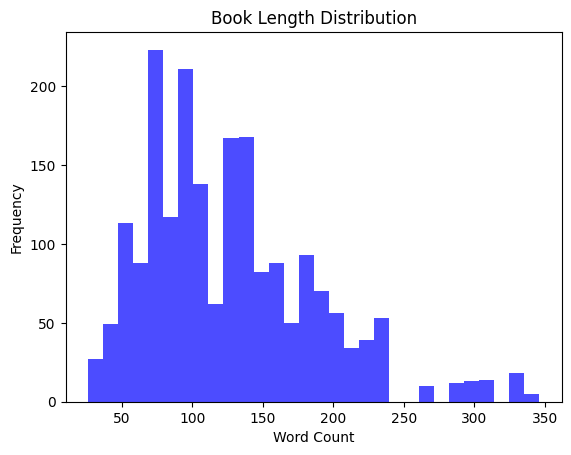

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Access the 'context' column as a list of strings
contexts = ds['context']

# Extract word counts from each context string (assuming they are space-separated)
word_counts = np.array([len(context.split()) for context in contexts])

plt.hist(word_counts, bins=30, color='blue', alpha=0.7)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Book Length Distribution")
plt.show()

# DATA QUALITY CHECKS

In [9]:
ds.filter(lambda x: any(v is None for v in x.values()))

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 0
})

In [10]:
from collections import Counter

def find_duplicates(doc_ids, dataset_name):
    """Find and print duplicate document IDs in a dataset split."""
    duplicate_values = [item for item, count in Counter(doc_ids).items() if count > 1]

    print(f"\nDuplicate values in {dataset_name} set:")
    if duplicate_values:
        print(f"Total Duplicates: {len(duplicate_values)}")
        print("Some Duplicate IDs:", duplicate_values[:5])  # Show first 5 for brevity
    else:
        print("No duplicates found.")

# Train set
doc_ids_train = [sample["id"] for sample in ds]
find_duplicates(doc_ids_train, "train")


Duplicate values in train set:
No duplicates found.


# STATISTICAL ANALYSIS

In [11]:
import numpy as np

print("Train Set:")
text_lengths = [len(sample["context"]) for sample in ds]
print(f"Mean: {np.mean(text_lengths)}, Median: {np.median(text_lengths)}, Max: {max(text_lengths)}")


Train Set:
Mean: 776.459, Median: 711.0, Max: 2132


<ipython-input-14-5da419719c62>:12: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.boxplot(data=data, palette=["#3498db", "#e74c3c", "#2ecc71"], width=0.5, linewidth=2.5,


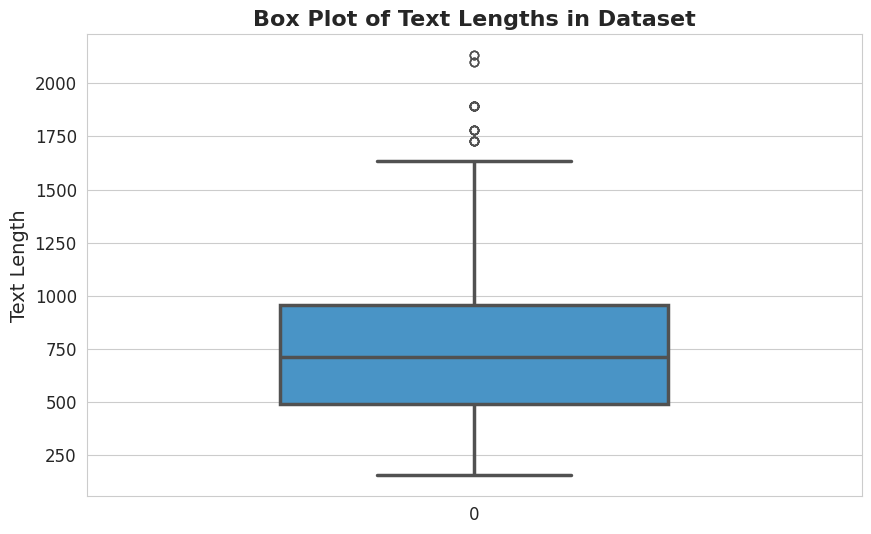

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_lengths = [len(sample.get("context", "")) for sample in ds]

data = [train_lengths]
labels = ["Train"]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(data=data, palette=["#3498db", "#e74c3c", "#2ecc71"], width=0.5, linewidth=2.5,
            flierprops=dict(marker='o', color='black', alpha=0.7))

plt.ylabel("Text Length", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Box Plot of Text Lengths in Dataset", fontsize=16, fontweight="bold")

plt.show()

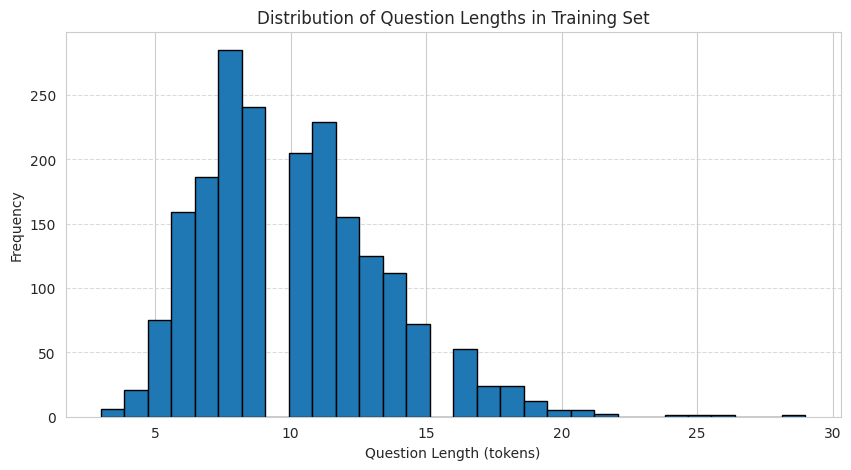

In [17]:
import matplotlib.pyplot as plt

token_counts = [len(sample["question"].split()) for sample in ds]

plt.figure(figsize=(10, 5))
plt.hist(token_counts, bins=30, edgecolor="black")
plt.xlabel("Question Length (tokens)")
plt.ylabel("Frequency")
plt.title("Distribution of Question Lengths in Training Set")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()